In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 问题1：
我们想知道电影评分的平均分，导演的人数信息，怎么获取？

In [16]:
path = "/Users/haizhenli/Documents/program/MLenv/data/IMDB-Movie-Data.csv"
movie = pd.read_csv(path)

In [17]:
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [18]:
movie["Rating"].mean()

np.float64(6.723199999999999)

In [19]:
movie["Director"].count()

np.int64(1000)

In [24]:
movie["Director"].unique().shape[0]

644

# 问题2:
对于这一组电影，如果我们想rating runtime（minutes）的分布情况，应该如何呈现数据？

<Axes: ylabel='Frequency'>

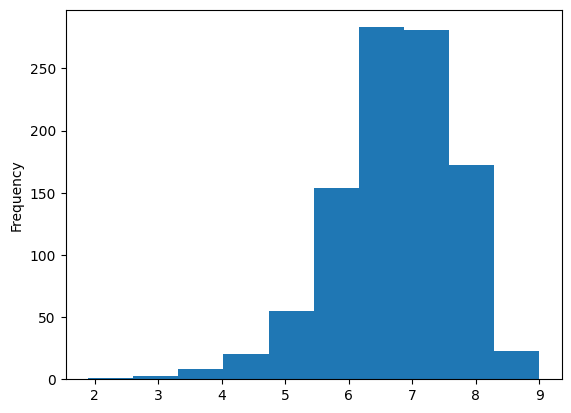

In [25]:
movie["Rating"].plot(kind="hist")

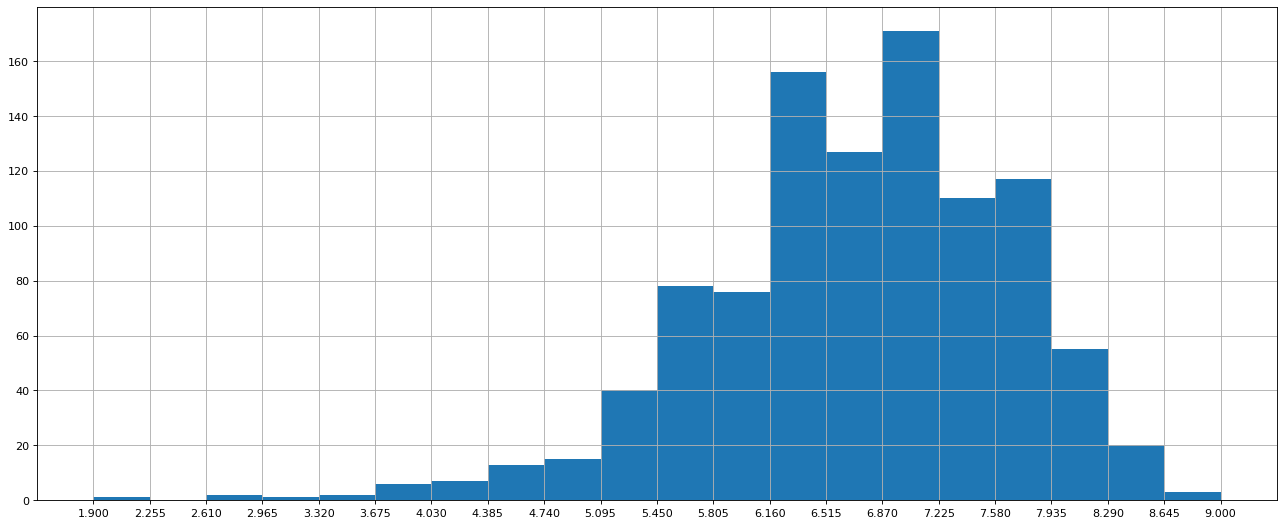

In [34]:
# 改进
# 1.创建画布
plt.figure(figsize=(20,8),dpi=80)

# 2.绘制
plt.hist(movie["Rating"].values,bins=20)

# 2.1 增加x轴刻度
max_ = movie["Rating"].max()
min_ = movie["Rating"].min()

x1 = np.linspace(min_,max_,21)
# print(x1)

plt.xticks(x1)

plt.grid()

# 3.显示
plt.show()

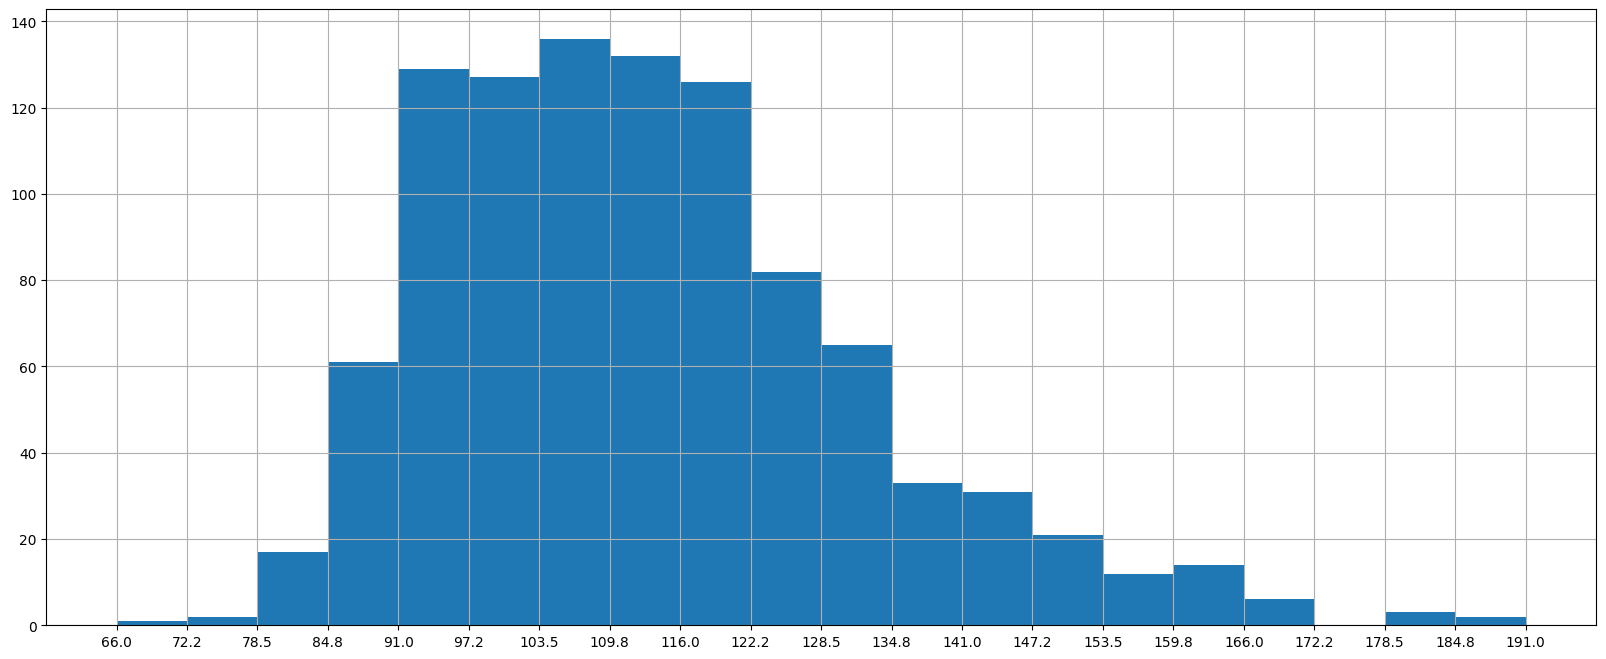

In [39]:
# 时长分布停机

# 1.创建画布
plt.figure(figsize=(20,8),dpi=100)

# 2.绘制
plt.hist(movie["Runtime (Minutes)"].values,20)

# 2.1 增加x轴刻度
max_ = movie["Runtime (Minutes)"].max()
min_ = movie["Runtime (Minutes)"].min()

x1 = np.linspace(min_,max_,21)
# print(x1)

plt.xticks(x1)

plt.grid()

# 3.显示
plt.show()

# 问题3:
这组电影数据，如果我们希望统计电影分类（genre）的情况，应该如何处理数据？

In [40]:
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [41]:
movie["Genre"]

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object

In [45]:
movie["Genre"].head()

0     Action,Adventure,Sci-Fi
1    Adventure,Mystery,Sci-Fi
2             Horror,Thriller
3     Animation,Comedy,Family
4    Action,Adventure,Fantasy
Name: Genre, dtype: object

In [48]:
# 进行字符串的分割
temp_list = [i.split(",") for i in movie["Genre"]]

In [52]:
# 提纯电影种类
array_list = np.unique([j for i in temp_list for j in i])

In [53]:
array_list

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'], dtype='<U9')

In [57]:
array_list.shape[0]

20

In [59]:
movie.shape[0]

1000

In [63]:
np.zeros((movie.shape[0], array_list.shape[0]))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1000, 20))

In [79]:
# 1创建一个全为零的df
# 行数与 movie 的行数相同，列数与 array_list 的长度一致，并将列名设置为 array_list
genre_zero = pd.DataFrame(np.zeros((movie.shape[0], array_list.shape[0])), columns = array_list)

In [80]:
genre_zero.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
# 2遍历每一部电影，genre_zero中把分类出现的列的值置为1
for i in range(1000):
    genre_zero.loc[i, temp_list[i]] = 1
# print(genre.sum().sort_velues())

In [83]:
genre_zero.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

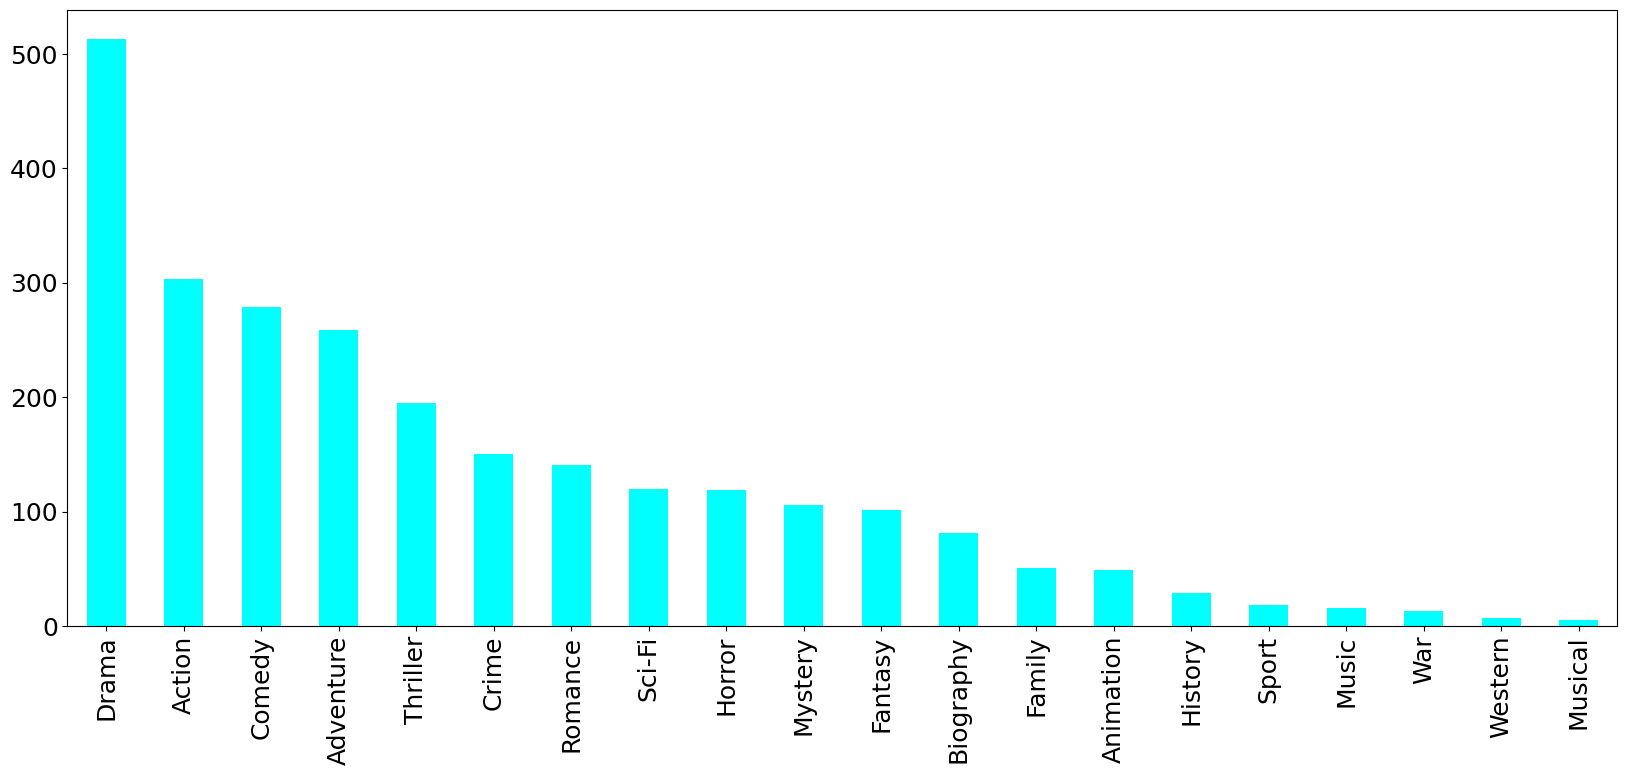

In [86]:
# 3求和画图
# .plot() 参数：kind="bar"：绘制柱状图。figsize=(20,8)：图表的宽度为 20，高度为 8。colormap="cool"：柱状图使用冷色渐变配色。fontsize=18：调整图表字体大小
genre_zero.sum().sort_values(ascending=False).plot(kind="bar", figsize=(20,8), colormap="cool",fontsize=18)